In [1]:
'''
lang:py
author:Yuan
'''
#处理csv格式文件，简单统计分析
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#读取三个文件到三个dataframe变量中。
annotations = pd.read_csv('D:PREAI/csv_files/annotations.csv',low_memory = None)
candidates = pd.read_csv('D:PREAI/csv_files/candidates.csv',low_memory = None)
candidates_class = pd.read_csv('D:PREAI/csv_files/candidates_class.csv',low_memory = None)

            coordX       coordY       coordZ  diameter_mm
count  1186.000000  1186.000000  1186.000000  1186.000000
mean     -5.067547     8.428113  -160.159029     8.306527
std      84.468115    98.316003   279.829437     4.762033
min    -164.351031  -283.834336  -790.074799     3.253443
25%     -80.909225   -51.549643  -221.197808     5.107177
50%     -32.855132    18.787926  -167.615160     6.433600
75%      76.830069    67.245915  -109.735281     9.696301
max     164.763985   271.405521  1790.494057    32.270030


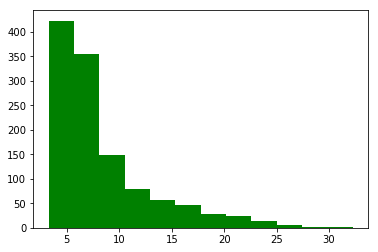

In [3]:
#关于第一个文件annotations，其中的数据就是病人的id，以及结节的坐标。不过这个文件应该就是实例吧，很小。
print annotations.describe()
plt.hist(annotations['diameter_mm'], 12, normed=0, facecolor='green')
plt.show()
#可以看出大部分的病人的结节直径在5mm以下，均值为8.306。
#下面也统计了关于各个数值型变量的最值。
#print candidates.describe
#print candidates.describe()

In [4]:
def getFileName(path,s):
#获取指定目录下的所有指定后缀的文件名（去掉后缀和路径）
    s_ =[]
    f_list = os.listdir(path)
    # print f_list
    for root, dirs, files in os.walk(path):
        for name in files:
        # os.path.splitext():分离文件名与扩展名
            if os.path.splitext(name)[1] == s:
                os.path.join(root, name)
                s_.append(name[0:-len(s)])
        return s_
def getpeoid(s):
    #在annotations文化部中获取病人的节点信息
    alist = [s]
    return annotations[annotations['seriesuid'].isin(alist)] #将要过滤的数据放入字典中,使用isin对数据进行筛选,返回行索引以及每行筛选的结果,若匹配则返回ture
#获取匹配结果为ture的行
print getFileName('D:PREAI/sample_patients/','.raw')
print getpeoid('1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059')

['1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059', '1.3.6.1.4.1.14519.5.2.1.6279.6001.487268565754493433372433148666', '1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950']
                                            seriesuid     coordX     coordY  \
25  1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...  46.188539  48.402806   
26  1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...  36.392044  76.771663   

        coordZ  diameter_mm  
25 -108.578632    13.596471  
26 -123.321911     4.343200  
